# Project Ttile: Diabetes prediction using Neural Networks.
## Creator: Shireen Khan
## Domain: Medical
## Data source: Kaggle
### Objective: Predict if a patient has Diabetes or not using Neural networks [Deep Learning]. Try Different methods to improve the model Accuracy and minimize the loss.


## Import all the Libaries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [111]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [112]:
df.shape

(100000, 9)

In [113]:
df.sample(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
68089,Female,57.0,0,0,No Info,19.37,6.5,159,0
17973,Male,18.0,0,0,never,27.32,3.5,159,0
19787,Female,52.0,0,0,never,25.40,3.5,130,0


In [114]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

### Data preprocessing

In [115]:
df = df.replace({'Female':0,'Male':1,'Other':2})

C:\Users\SHIREEN KHAN\AppData\Local\Temp\ipykernel_18036\2698674652.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Female':0,'Male':1,'Other':2})


#### Encoding

In [117]:
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=False).astype(int)

### Scaling

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [119]:
scal_col = ['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current']
df[scal_col ]=scaler.fit_transform(df[scal_col])

In [120]:
df.sample(3)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
60716,1.187234,1.603011,-0.284439,4.936379,-0.583350,0.787897,-0.296209,0,-0.747008,-0.319946,-0.20423,-0.321198,1.35993,-0.262512
17316,-0.841047,0.671140,-0.284439,-0.202578,0.018883,-1.028455,-0.197948,0,-0.747008,-0.319946,-0.20423,-0.321198,1.35993,-0.262512
35682,-0.841047,-0.305106,-0.284439,-0.202578,-0.131675,0.787897,-1.303384,0,-0.747008,-0.319946,-0.20423,-0.321198,1.35993,-0.262512


### Split into x and y

In [121]:
x = df.drop(columns=['diabetes'])
y = df['diabetes']

In [122]:
x

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,-0.841047,1.691761,-0.284439,4.936379,-0.282234,0.787897,0.047704,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512
1,-0.841047,0.538015,-0.284439,-0.202578,0.018883,0.787897,-1.426210,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512
2,1.187234,-0.615730,-0.284439,-0.202578,0.018883,-0.120279,0.489878,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512
3,-0.841047,-0.260731,-0.284439,-0.202578,-0.583350,-0.120279,0.416183,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512
4,1.187234,1.514261,3.515687,4.936379,-1.035025,-1.028455,0.416183,-0.747008,3.125524,-0.20423,-0.321198,-0.735332,-0.262512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.841047,1.691761,-0.284439,-0.202578,0.018883,0.787897,-1.180558,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512
99996,-0.841047,-1.769475,-0.284439,-0.202578,-1.486700,0.787897,-0.934905,1.338674,-0.319946,-0.20423,-0.321198,-0.735332,-0.262512
99997,1.187234,1.070513,-0.284439,-0.202578,0.018883,-0.120279,0.416183,-0.747008,-0.319946,-0.20423,3.113342,-0.735332,-0.262512
99998,-0.841047,-0.793229,-0.284439,-0.202578,1.223350,-1.028455,-0.934905,-0.747008,-0.319946,-0.20423,-0.321198,1.359930,-0.262512


In [123]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Model Building [ANN]

In [125]:
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [126]:
x_train.shape

(80000, 13)

#### Model 1

In [ ]:
model_1 = Sequential()
model_1.add(Dense(20,input_shape=(13,),activation='relu')) # hidden layer 
model_1.add(Dense(1,activation='sigmoid')) # output layer

c:\Users\SHIREEN KHAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
model_1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [129]:
model_1.fit(x_train,y_train,epochs=5)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9482 - loss: 0.1533
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9592 - loss: 0.1194
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9601 - loss: 0.1174
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9612 - loss: 0.1158
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9623 - loss: 0.1140


In [130]:
model_1.evaluate(x_test,y_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.9611 - loss: 0.1157


[0.1156972274184227, 0.9611499905586243]

### Model 2

In [131]:
model_2 = Sequential()
model_2.add(Dense(120,input_shape=(13,),activation='relu')) # Hidden layer 1
model_2.add(Dropout(0.5))
model_2.add(Dense(60,activation='relu')) # Hidden layer 2
model_2.add(Dropout(0.5))
model_2.add(Dense(32,activation='relu')) # Hidden layer 3
model_2.add(Dropout(0.5))
model_2.add(Dense(1,activation='sigmoid'))

c:\Users\SHIREEN KHAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [133]:
history = model_2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9449 - loss: 0.1641 - val_accuracy: 0.9614 - val_loss: 0.1144
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9616 - loss: 0.1211 - val_accuracy: 0.9656 - val_loss: 0.1038
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9648 - loss: 0.1110 - val_accuracy: 0.9658 - val_loss: 0.0989
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9654 - loss: 0.1050 - val_accuracy: 0.9663 - val_loss: 0.0972
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9660 - loss: 0.1035 - val_accuracy: 0.9664 - val_loss: 0.0969
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9664 - loss: 0.1008 - val_accuracy: 0.9660 - val_loss: 0.1003
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9665 - loss: 0.1005 - val_accuracy: 0.9673 - val_loss: 0.0945
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9669 - loss: 0.0986 - 

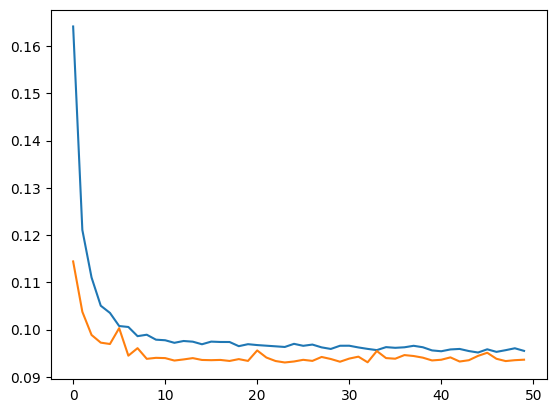

In [134]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

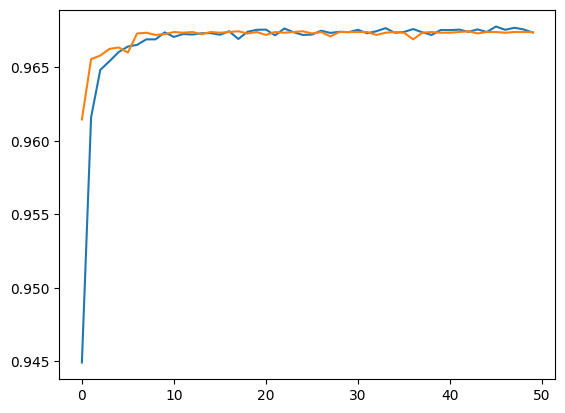

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [136]:
pred = model_2.predict(x_test)
binary_pred = (pred > 0.5).astype(int)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step


#### Classification report

In [137]:
from sklearn.metrics import classification_report
report = classification_report(y_test,binary_pred,output_dict=True)
report_2 = classification_report(y_test,binary_pred)
print(report_2)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       1.00      0.62      0.76      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.81      0.87     20000
weighted avg       0.97      0.97      0.96     20000



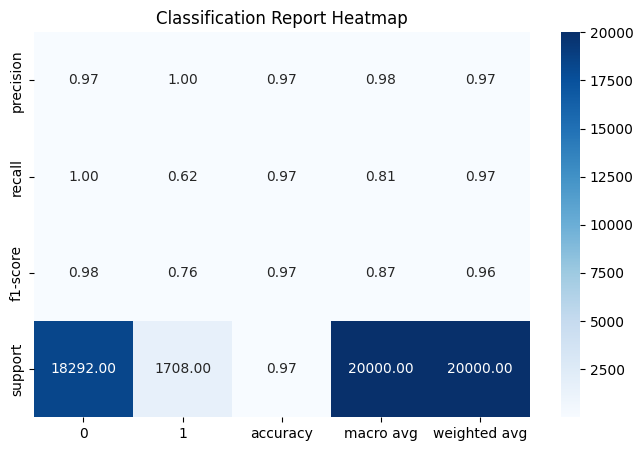

In [138]:
df_report = pd.DataFrame(report)

plt.figure(figsize=(8, 5))
sns.heatmap(df_report, annot=True, fmt=".2f", cmap="Blues")
plt.title("Classification Report Heatmap")
plt.show()

### Conclusion:
Precision for class 0 is 0.97 and for class 1 is 1.00

Recall for class 0 is 1.00 and for class 1 is 0.62

F1-score for class 0 is 0.98 and for class 1 is 0.76

support is the total no. of occurrence of each class (18,292 for class 0 and 1708 for class 1)

Accuracy 0.97

## Thankyou